In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set style for plots
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Basic Bags of Words

In [2]:
# Sample dataset
documents = [
    "The cat sat on the mat",
    "The dog sat on the log",
    "The cat and dog are friends",
    "Dogs and cats are pets"
]

print("Sample Documents:")
for i, doc in enumerate(documents):
    print(f'Document {i+1}: {doc}')

Sample Documents:
Document 1: The cat sat on the mat
Document 2: The dog sat on the log
Document 3: The cat and dog are friends
Document 4: Dogs and cats are pets


##### Basic BoW Implemented

In [3]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Get feature names out
feature_names = vectorizer.get_feature_names_out()

# Convert this materix to a DataFrame
bow_df = pd.DataFrame(X.toarray(), columns=feature_names)
print("Bag of words representation:")
print(bow_df)

Bag of words representation:
   and  are  cat  cats  dog  dogs  friends  log  mat  on  pets  sat  the
0    0    0    1     0    0     0        0    0    1   1     0    1    2
1    0    0    0     0    1     0        0    1    0   1     0    1    2
2    1    1    1     0    1     0        1    0    0   0     0    0    1
3    1    1    0     1    0     1        0    0    0   0     1    0    0


##### Data preprocessing and cleaning

In [4]:
# Custom implementation of Bag-of-Words
def simple_preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords_set = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_set]

    return tokens

##### Create a vocabulary from Documents

In [5]:
# Create vocabulary
vocabulary = set()
for doc in documents:
    tokens = simple_preprocess(doc)
    vocabulary.update(tokens)

vocabulary = sorted(list(vocabulary))
print("Vocabulary:", vocabulary)

Vocabulary: ['cat', 'cats', 'dog', 'dogs', 'friends', 'log', 'mat', 'pets', 'sat']


##### Create a customized bag-of-words from documents

In [6]:
bow_vectors = []
for doc in documents:
    tokens = simple_preprocess(doc)
    vector = [tokens.count(word) for word in vocabulary]
    bow_vectors.append(vector)

manual_bow_df = pd.DataFrame(bow_vectors, columns=vocabulary)
print("Manual Bag of Words representation:")
print(manual_bow_df)

Manual Bag of Words representation:
   cat  cats  dog  dogs  friends  log  mat  pets  sat
0    1     0    0     0        0    0    1     0    1
1    0     0    1     0        0    1    0     0    1
2    1     0    1     0        1    0    0     0    0
3    0     1    0     1        0    0    0     1    0


##### Visualize BoW

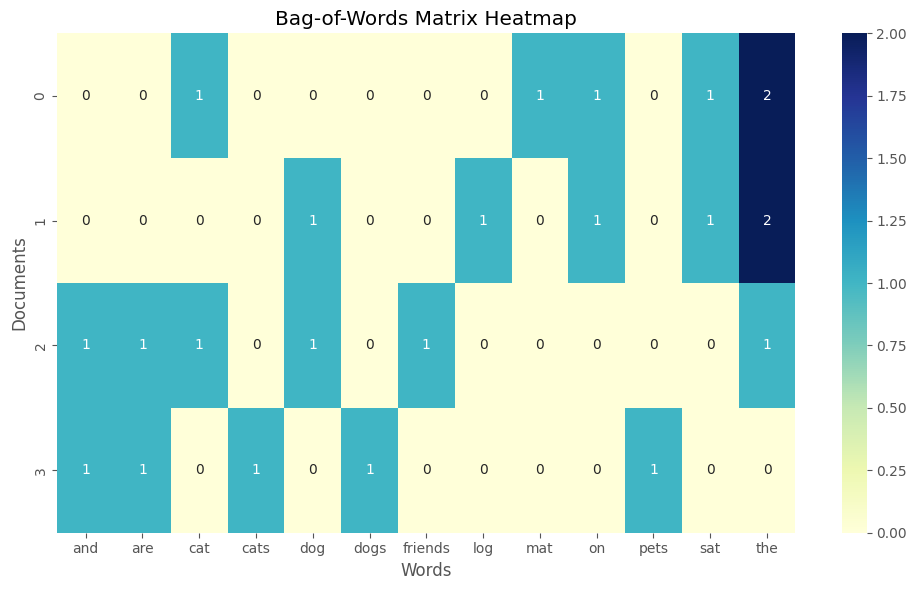

In [7]:
# Visualize the Bag-of-Words matrix
plt.figure(figsize=(10, 6))
sns.heatmap(bow_df, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Bag-of-Words Matrix Heatmap")
plt.ylabel("Documents")
plt.xlabel("Words")
plt.tight_layout()
plt.show()

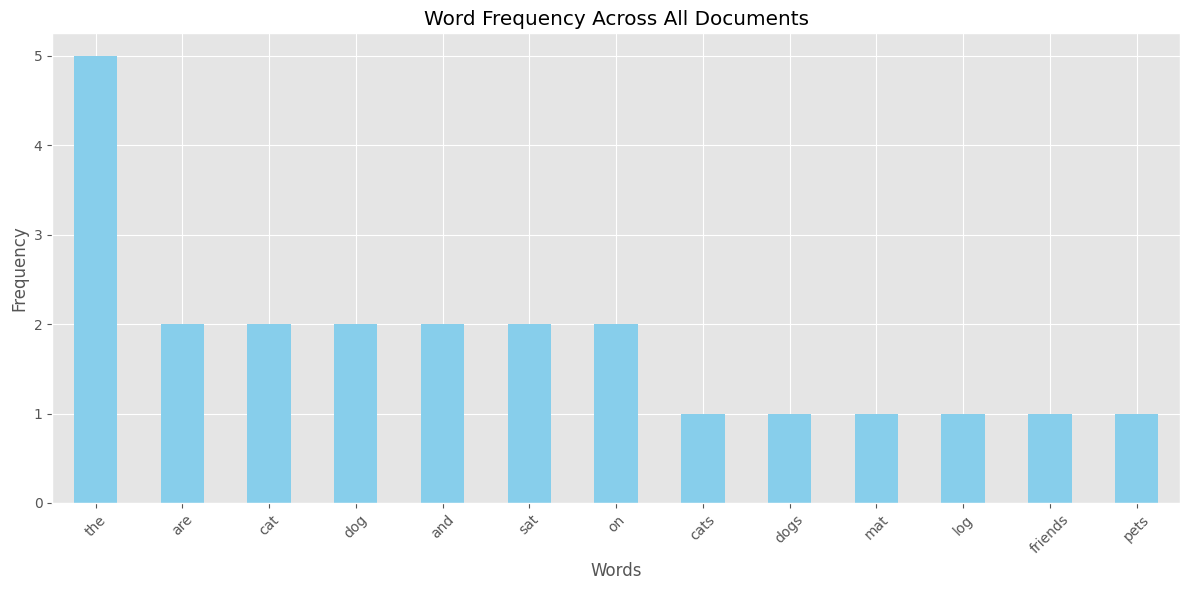

In [8]:
# Word frequency visualization
word_freq = bow_df.sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
word_freq.plot(kind='bar', color='skyblue')
plt.title("Word Frequency Across All Documents")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Let's use a slightly larger dataset
# Create a more diverse set of documents
# Create a more carefully crafted set of documents
# Create a more carefully crafted set of documents
larger_docs = [
    # Technology focus
    "Machine learning algorithms use neural networks for deep learning applications in artificial intelligence. AI systems process data to make predictions.",
    
    # Technology + Healthcare overlap
    "Artificial intelligence is transforming healthcare with machine learning algorithms that analyze medical data to improve patient diagnosis and treatment.",
    
    # Healthcare focus
    "Medical diagnosis requires careful analysis of patient data, symptoms, and test results. Doctors use this information to determine treatment plans.",
    
    # Healthcare + Sports overlap
    "Sports medicine specialists analyze athlete data to prevent injuries and improve treatment outcomes. They use various diagnostic tools.",
    
    # Sports focus
    "Basketball players practice shooting techniques to improve their accuracy. Professional athletes follow strict training regimens to enhance performance.",
    
    # Sports + Cooking overlap
    "Professional athletes follow specific nutrition plans that include high-protein meals. Chefs prepare specialized dishes for sports teams.",
    
    # Cooking focus
    "Chocolate chip cookies require specific ingredients: flour, sugar, butter, and chocolate chips. Baking at the right temperature is crucial for perfect cookies.",
    
    # Cooking + Technology overlap
    "Modern kitchens use smart technology for cooking. AI-powered ovens can automatically adjust temperature and cooking time based on the recipe."
]

##### TF-IDF

In [10]:
# TF-IDF as an extension of BoW
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, min_df=2,  # Only include words that appear in at least 2 documents
    max_df=0.8  # Exclude words that appear in more than 80% of documents 
    )
X_tfidf = tfidf_vectorizer.fit_transform(larger_docs)

# convert vectorizer to a dataframe
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF representation:")
# print(tfidf_df)
print(tfidf_df.round(3))

# Fetch the important words only
word_importance = tfidf_df.sum().sort_values(ascending=False)
print("Important words based on TF-IDF scores:")
print(word_importance.head(15))  

TF-IDF representation:
      ai  algorithms  analyze  artificial  athletes   data  diagnosis  follow  \
0  0.314       0.314    0.000       0.314     0.000  0.238      0.000   0.000   
1  0.000       0.301    0.301       0.301     0.000  0.227      0.301   0.000   
2  0.000       0.000    0.000       0.000     0.000  0.312      0.412   0.000   
3  0.000       0.000    0.465       0.000     0.000  0.351      0.000   0.000   
4  0.000       0.000    0.000       0.000     0.517  0.000      0.000   0.517   
5  0.000       0.000    0.000       0.000     0.408  0.000      0.000   0.408   
6  0.000       0.000    0.000       0.000     0.000  0.000      0.000   0.000   
7  0.623       0.000    0.000       0.000     0.000  0.000      0.000   0.000   

   improve  intelligence  ...  machine  medical  patient  plans  professional  \
0    0.000         0.314  ...    0.314    0.000    0.000  0.000         0.000   
1    0.259         0.301  ...    0.301    0.301    0.301  0.000         0.000   
2   

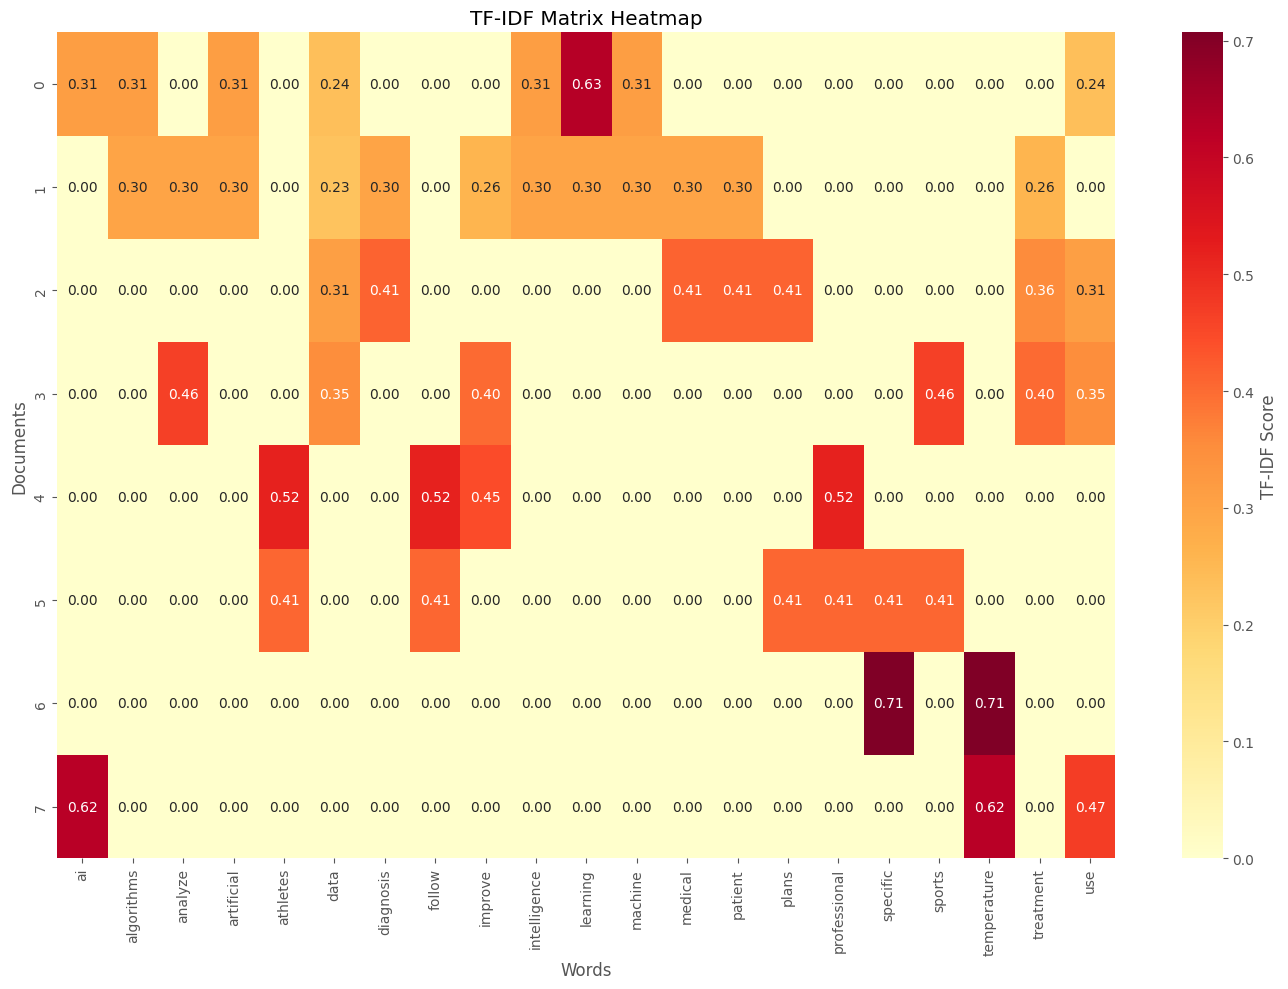

ValueError: Shape of passed values is (8, 8), indices imply (4, 4)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Create a heatmap of the TF-IDF matrix
plt.figure(figsize=(14, 10))
sns.heatmap(tfidf_df, annot=True, fmt='.2f', cmap="YlOrRd", 
            cbar_kws={'label': 'TF-IDF Score'})
plt.title("TF-IDF Matrix Heatmap")
plt.ylabel("Documents")
plt.xlabel("Words")
plt.tight_layout()
plt.show()

# Let's also look at document similarities based on TF-IDF
cosine_sim = cosine_similarity(X_tfidf)
print(f"Cosine similarity matrix shape: {cosine_sim.shape}")

# Create DataFrame for cosine similarity
n_documents = len(larger_docs)
cosine_sim_df = pd.DataFrame(cosine_sim, 
                             index=[f"Doc {i+1}" for i in range(n_documents)],
                             columns=[f"Doc {i+1}" for i in range(n_documents)])

print("\nDocument Similarity Matrix (Based on TF-IDF):")
print(cosine_sim_df.round(3))

# Visualize document similarities
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap="Blues", fmt='.3f')
plt.title("Document Similarity Heatmap")
plt.tight_layout()
plt.show()